In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt


In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

project_dir = module_path + "/Timeseries/"
data_dir = project_dir + 'data/'
cur_dir = project_dir + 'notebooks/'
image_dir = project_dir + 'images/'


In [3]:
import pandas as pd

df = pd.read_csv(data_dir + 'PJME_hourly.csv')
df.index = pd.to_datetime(df['Datetime'])
df.drop(columns='Datetime', inplace=True)
df.head()


,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [4]:
df.describe()
df.columns

Index(['PJME_MW'], dtype='object')

In [29]:
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

Create data functions

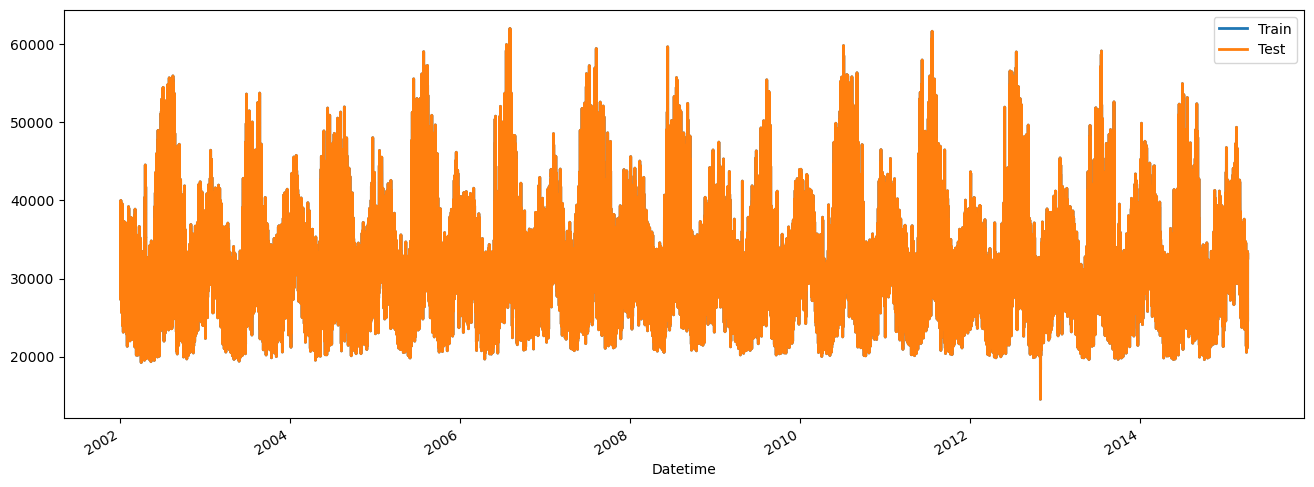

In [8]:
def get_train_test_generic(for_prophet=False, freq=None):
    df = pd.read_csv(data_dir + 'PJME_hourly.csv')
    df.index = pd.to_datatime(df['Datetime'])
    df.drop(columns='Datetime', inplace=True)
    train_df = df.loc[df.index < '01-01-2016']
    test_df = df.loc[df.index >= '01-01-2016']
    if freq is not  None:
        train_df =  train_df[['PJME_MW']].resample(freq).sum()
        test_df =  test_df[['PJME_MW']].resample(freq).sum()
        df = df[['PJME_MW']].resample(freq).sum()
    if for_prophet:
        df = df.reset_index()
        df.columns=['ds','y']
        df.index = df.ds
        df.index.names = ['datetimeIndex']
        train_df = train_df.reset_index()
        train_df.columns= ['ds','y']
        train_df.index = train_df.ds
        train_df.index.names = ['datetimeIndex']
        test_df.columns=['ds','y']
        test_df.index = test_df.ds
        test_df.index.names =['datetimeIndex']
    return train_df,test_df,df    

def get_data():
    df = pd.read_csv(data_dir + 'PJME_hourly.CSV')
    df.index = pd.to_datetime(df['Datetime'])
    df.drop(columns='Datetime',inplace=True)
    return data
def convert_to_prophet(df):
    df = df.reset_index()
    df.columns= ['ds','y']
    df.index = df.ds
    df.index.names = ['datetimeIndex']
    return df
def get_train_test_generic(for_prophet=False, freq=None):
    df = pd.read_csv(data_dir +'PJME_hourly.csv')
    df.index = pd.to_datetime(df['Datetime'])
    df.drop(columns='Datetime', inplace=True)
    df.sort_index(inplace=True)
    if freq is not None:
        df = df[['PJME_MW']].resample(freq).sum()
    train_len = int(.8*len(df))
    train_df = df.iloc[:train_len].copy()
    test_df = df.iloc[:train_len].copy()    

    if for_prophet:
        df= convert_to_prophet(df)
        train_df = convert_to_prophet(train_df)
        test_df = convert_to_prophet(test_df)
    return train_df,test_df,df    
tr_df, te_df, df = get_train_test_generic()
from pylab import rcParams
rcParams['figure.figsize'] = 16,6
tr_df['PJME_MW'].plot(label='Train', legend=True, linewidth=2)
te_df['PJME_MW'].plot(label='Test', legend=True, linewidth=2)

plt.show()

In [9]:
tr_df, te_df, df = get_train_test_generic()
display(tr_df)
display(te_df)

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2015-04-09 10:00:00,33082.0
2015-04-09 11:00:00,33285.0
2015-04-09 12:00:00,33148.0


,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2015-04-09 10:00:00,33082.0
2015-04-09 11:00:00,33285.0
2015-04-09 12:00:00,33148.0


In [ ]:

tr_df, te_df, df = get_train_test_generic(freq='ID')
tr_df.head()

understading data via visualisations and other means

Distribution of energy consumption across all the data 

<Axes: title={'center': 'Distribution of PJME Load in MW'}, ylabel='Frequency'>

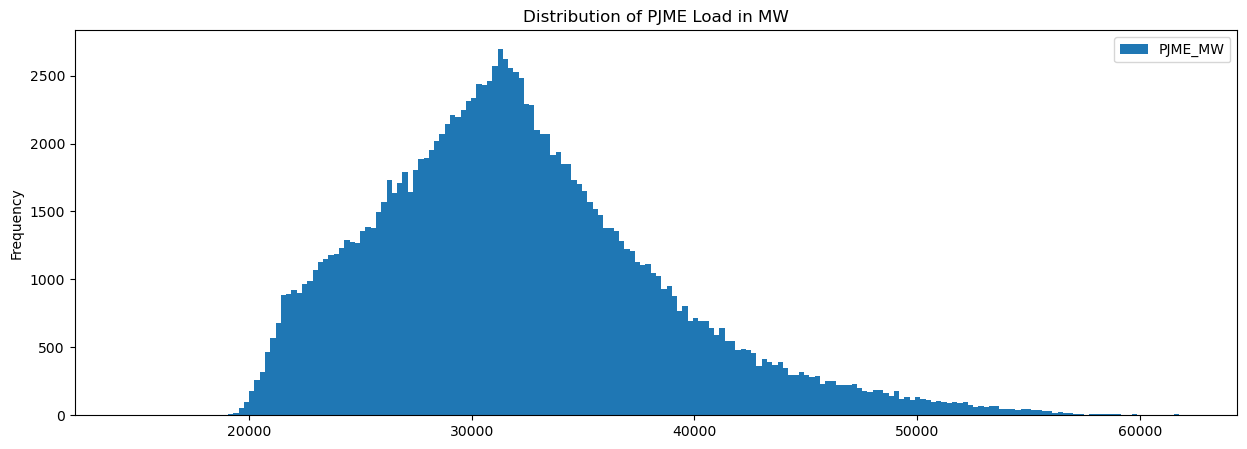

In [15]:
tr_df, te_df, df = get_train_test_generic()
df.plot.hist(figsize=(15, 5),bins=200, title='Distribution of PJME Load in MW')


Hourly Energy consumption across all years (2002-2018)

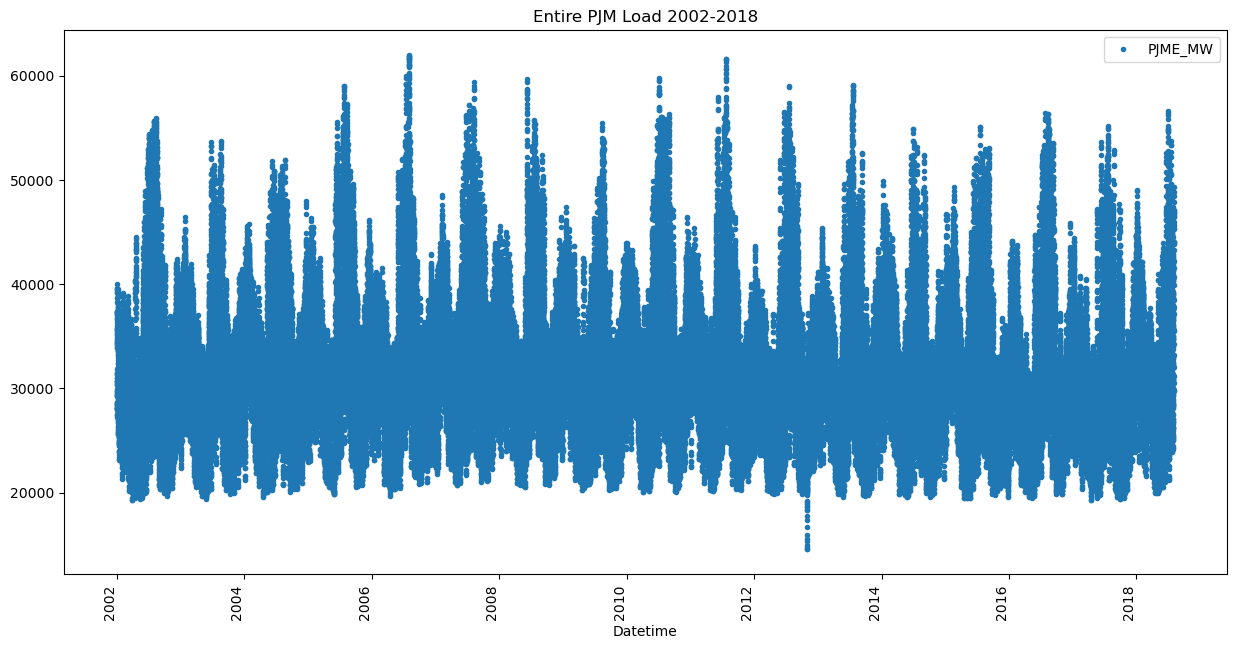

In [16]:
plot = df.plot(style='.', figsize=(15,8), title='Entire PJM Load 2002-2018', rot=90)

Hourly Energy consumption across all years (2002-2018)

<Axes: title={'center': '2017 year data'}, xlabel='Datetime'>

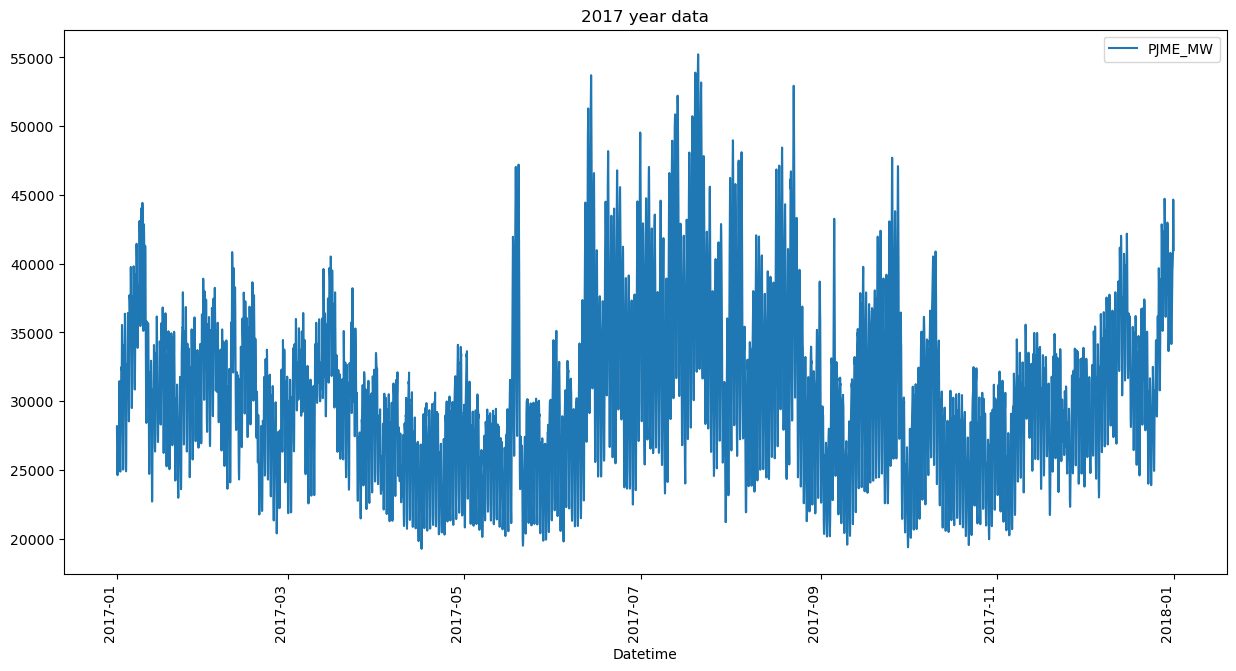

In [17]:
df.loc[df.index.year == 2017].plot(figsize=(15,8), title='2017 year data', rot=90)

In [ ]:
Hourly Energy consumption in the month of January in 2017

<Axes: title={'center': '2017 January data'}, xlabel='Datetime'>

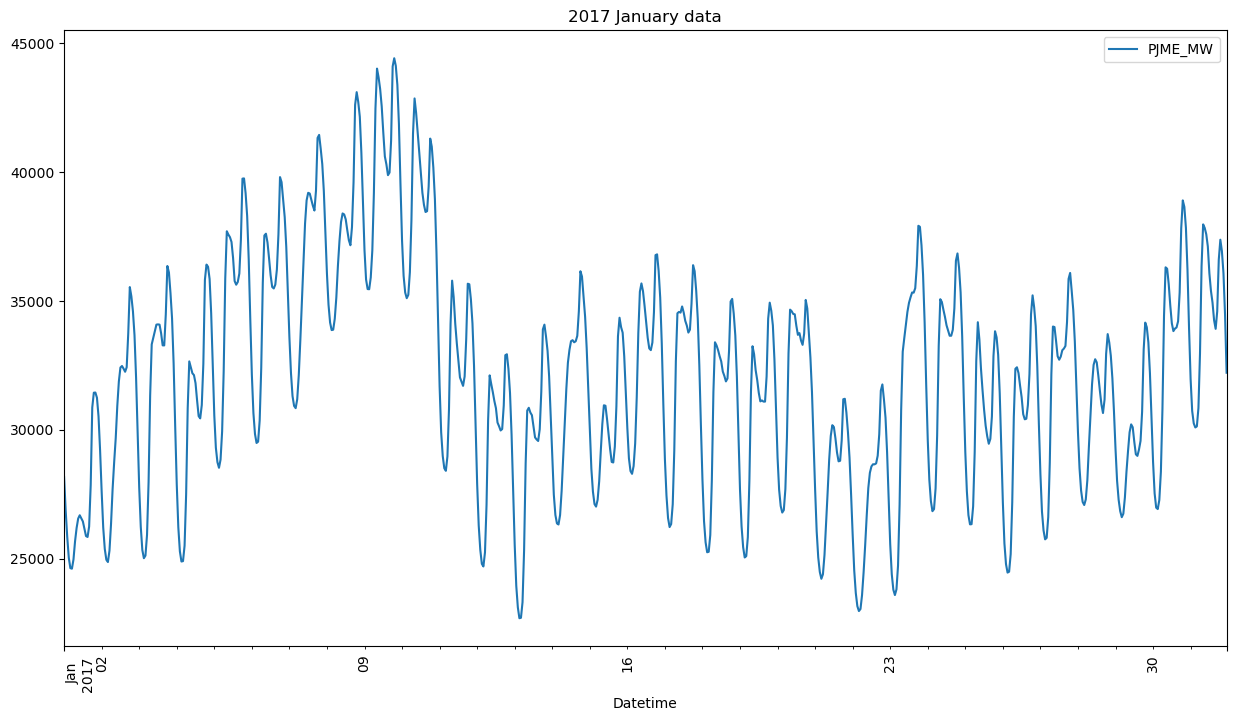

In [22]:
df.loc[(df.index.year == 2017)& (df.index.month == 1)].plot(figsize=(15,8), title='2017 January data', rot=90)

Hourly Energy consumption in the month of January in 2017 Week 1

In [23]:
single_week_mask = (df.index.year ==2017) & (df.index.month == 1) & (df.index.week == 1)
df.loc[single_week_mask].plot(figsize=(15,8), title='2017 January last week data', rot=90)

AttributeError: 'DatetimeIndex' object has no attribute 'week'

<Axes: title={'center': '2017 January 1st week data'}, xlabel='Datetime'>

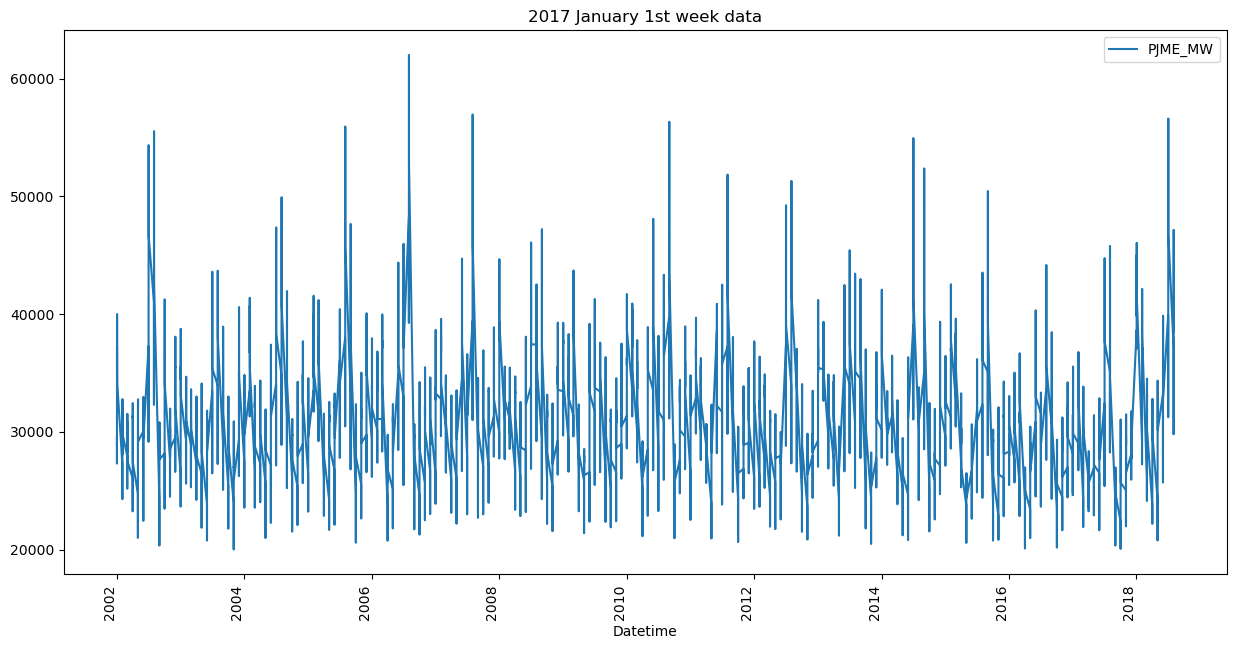

In [25]:
single_week_mask = (df.index.year ==2017) & (df.index.month == 1) & (df.index.day == 1) | (df.index.day == 2) 
df.loc[single_week_mask].plot(figsize=(15,8), title='2017 January 1st week data', rot=90)

Visualisation by group

In [27]:
df['date'] = df.index.date
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['dom'] = df.index.day
df['dow'] = df.index.dayofweek
df['doy'] = df.index.dayofyear
df['weekday'] = df.index.day_name()
df['hour'] = df.index.hour


In [28]:
df.head()

,PJME_MW,date,year,quarter,month,dom,dow,doy,weekday,hour
Datetime,,,,,,,,,,
2002-01-01 01:00:00,30393.0,2002-01-01,2002,1,1,1,1,1,Tuesday,1
2002-01-01 02:00:00,29265.0,2002-01-01,2002,1,1,1,1,1,Tuesday,2
2002-01-01 03:00:00,28357.0,2002-01-01,2002,1,1,1,1,1,Tuesday,3
2002-01-01 04:00:00,27899.0,2002-01-01,2002,1,1,1,1,1,Tuesday,4
2002-01-01 05:00:00,28057.0,2002-01-01,2002,1,1,1,1,1,Tuesday,5


Hourly Energy consumption

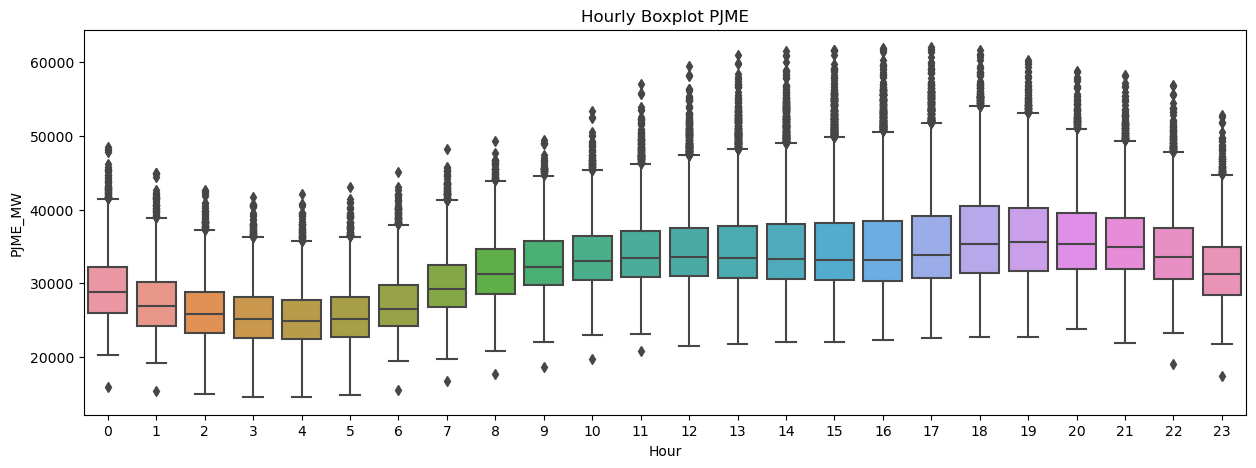

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x=df['hour'], y=df['PJME_MW'], ax=ax)
ax.set_title('Hourly Boxplot PJME')
ax.set_xlabel('Hour')
ax.set_ylabel('PJME_MW')

plt.show()


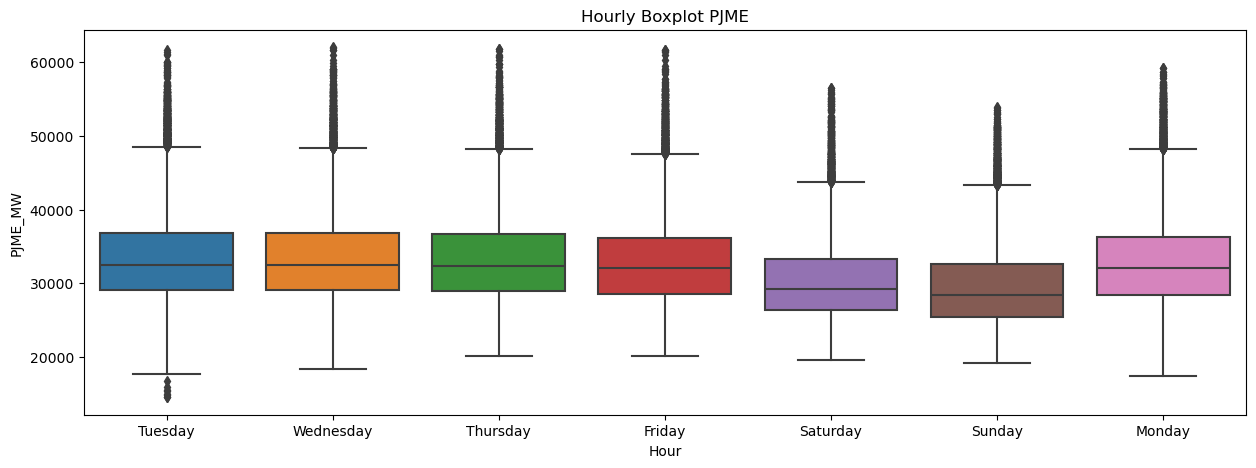

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Assuming df contains 'hour' and 'PJME_MW' columns
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x=df['weekday'], y=df['PJME_MW'], ax=ax)
ax.set_title('Weekday Boxplot PJME')
ax.set_xlabel('Hour')
ax.set_ylabel('PJME_MW')

plt.show()


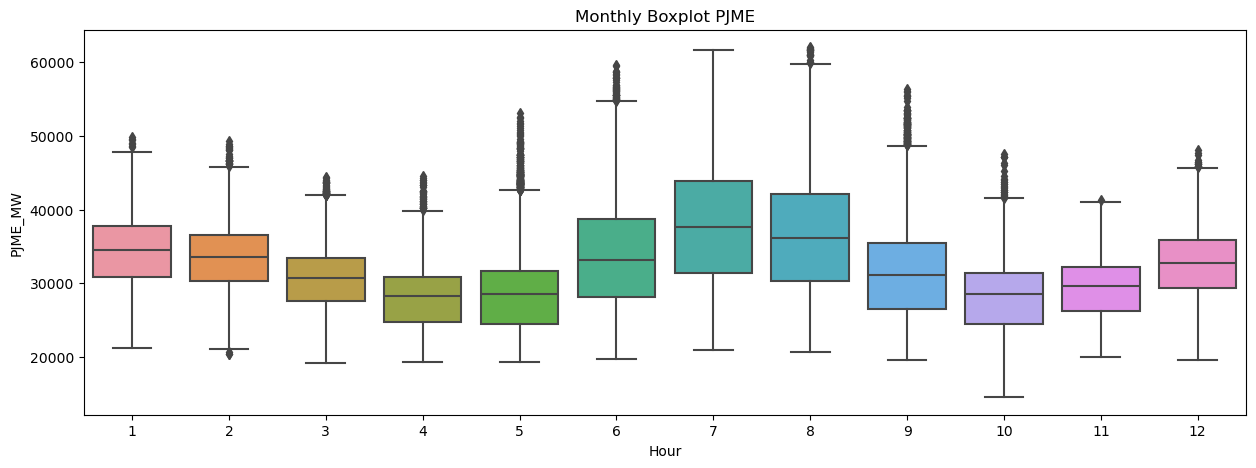

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Assuming df contains 'hour' and 'PJME_MW' columns
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x=df['month'], y=df['PJME_MW'], ax=ax)
ax.set_title('Monthly Boxplot PJME')
ax.set_xlabel('Hour')
ax.set_ylabel('PJME_MW')

plt.show()


Weekday and hour energy consumption

In [37]:
df2 = df.pivot_table(index=df['hour'], columns='weekday', values='PJME_MW', aggfunc='sum')
df2.head()
df2.plot(figsize=(15,4), title='PJME -Daily Trends')

KeyError: 'hour'

Create Data functions

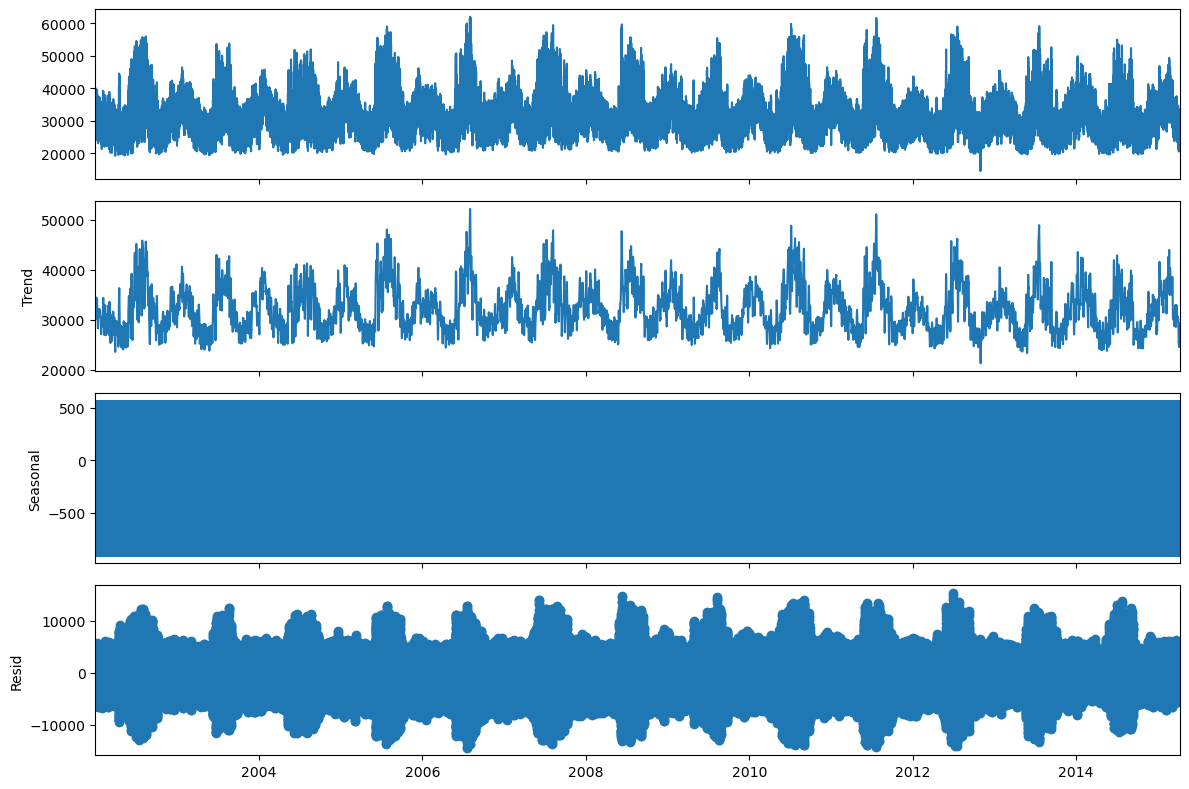

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(tr_df[['PJME_MW']], period=48)
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
fig = result.plot()


Daily seasonly within a week decomposition

,PJME_MW
Datetime,
2012-01-01 00:00:00,26949.0
2012-01-01 01:00:00,25727.0
2012-01-01 02:00:00,24710.0
2012-01-01 03:00:00,23908.0
2012-01-01 04:00:00,23589.0


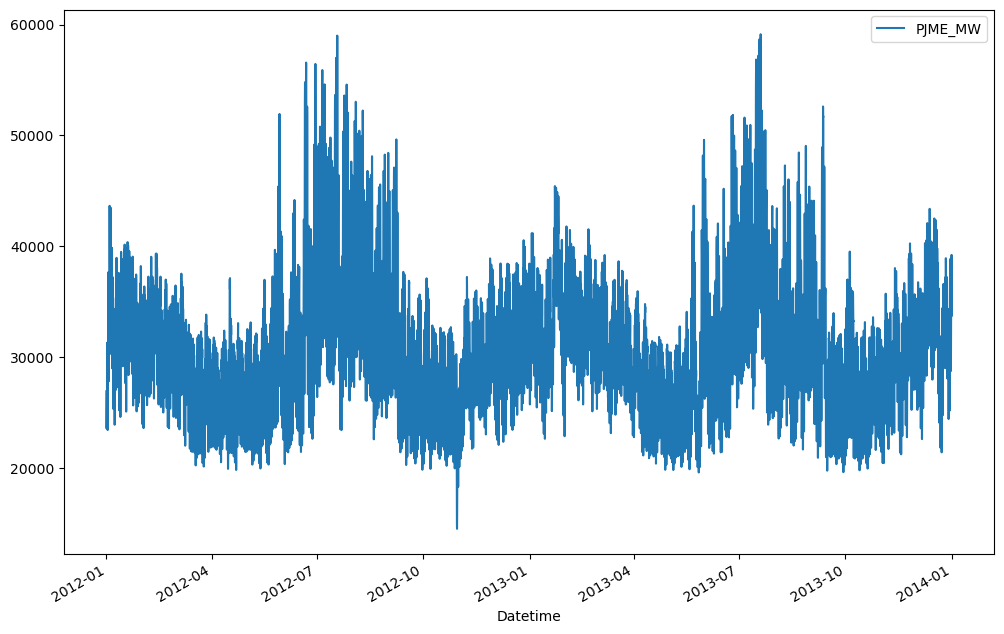

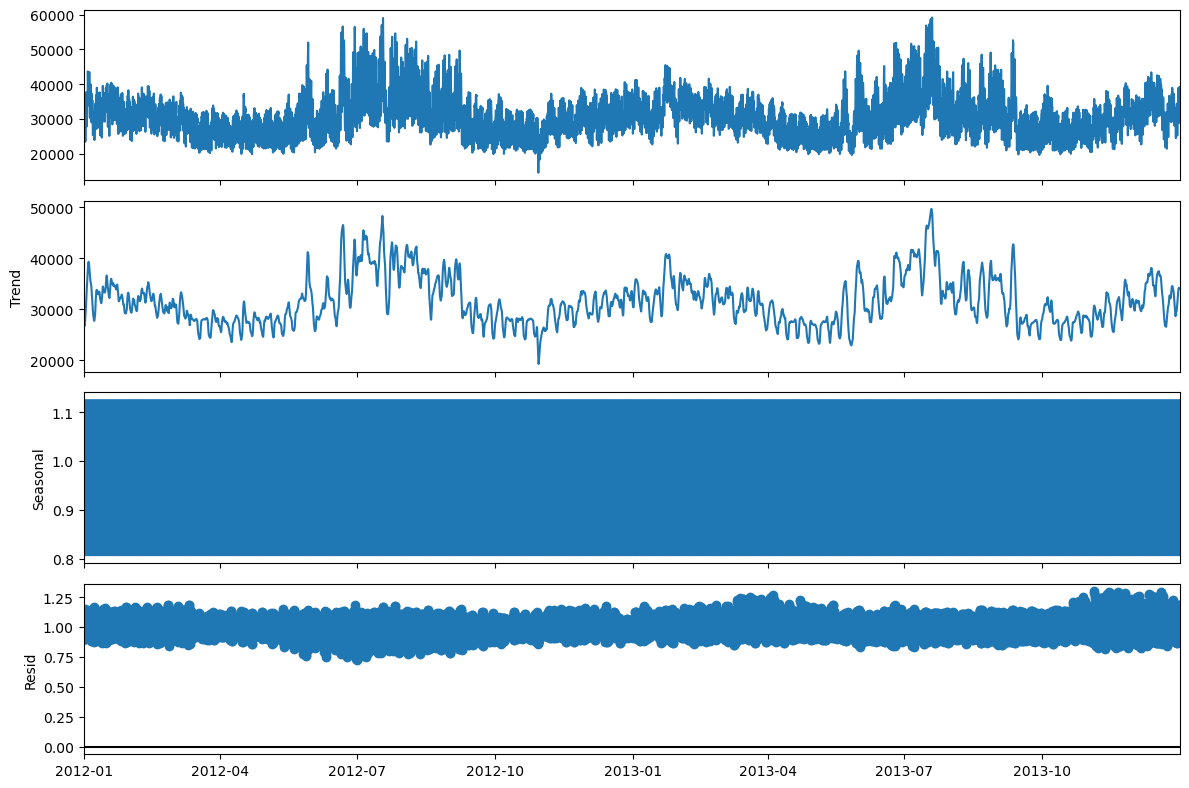

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
tr_sub = tr_df.loc[tr_df.index < '01-01-2014']
tr_sub = tr_df.loc[(tr_df.index >= '01-01-2012') & (tr_df.index < '01-01-2014')]
display(tr_sub.head())
tr_sub = tr_sub.sort_index()
tr_sub.plot()
result = seasonal_decompose(tr_sub, period=24, model='mul')
from pylab import rcParams
rcParams['figure.figsize'] =12,8
fig = result.plot()




Reasampled view of data at aggregate level

In [47]:
daily_df = df['PJME_MW'].resample().mean()
display(daily_df.head())
rcParams['figure.figsize'] = 16,8
daily_df.loc[daily_df.index > '2017'].plot()

KeyError: 'PJME_MW'

Useful validation metrics and plots 